In [4]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
mamun1113_doctors_handwritten_prescription_bd_dataset_path = kagglehub.dataset_download('mamun1113/doctors-handwritten-prescription-bd-dataset')

print('Data source import complete.')

100%|██████████| 19.1M/19.1M [00:00<00:00, 120MB/s] 

Extracting files...


Data source import complete.


In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
import kagglehub, os

# Reconfirm the KaggleHub download path
dataset_path = kagglehub.dataset_download('mamun1113/doctors-handwritten-prescription-bd-dataset')
print("KaggleHub path:", dataset_path)

# List all contents deeply (3 levels)
for root, dirs, files in os.walk(dataset_path):
    print(root)
    if files:
        print("   Files:", files[:5])

KaggleHub path: /root/.cache/kagglehub/datasets/mamun1113/doctors-handwritten-prescription-bd-dataset/versions/1
/root/.cache/kagglehub/datasets/mamun1113/doctors-handwritten-prescription-bd-dataset/versions/1
/root/.cache/kagglehub/datasets/mamun1113/doctors-handwritten-prescription-bd-dataset/versions/1/Doctor’s Handwritten Prescription BD dataset
/root/.cache/kagglehub/datasets/mamun1113/doctors-handwritten-prescription-bd-dataset/versions/1/Doctor’s Handwritten Prescription BD dataset/Training
   Files: ['training_labels.csv']
/root/.cache/kagglehub/datasets/mamun1113/doctors-handwritten-prescription-bd-dataset/versions/1/Doctor’s Handwritten Prescription BD dataset/Training/training_words
   Files: ['1863.png', '127.png', '1952.png', '1678.png', '1303.png']
/root/.cache/kagglehub/datasets/mamun1113/doctors-handwritten-prescription-bd-dataset/versions/1/Doctor’s Handwritten Prescription BD dataset/Validation
   Files: ['validation_labels.csv']
/root/.cache/kagglehub/datasets/mamun1

In [7]:
train_dir = os.path.join(dataset_path, "Doctor’s Handwritten Prescription BD dataset/Training/training_words")
train_csv = os.path.join(dataset_path, "Doctor’s Handwritten Prescription BD dataset/Training/training_labels.csv")

val_dir = os.path.join(dataset_path, "Doctor’s Handwritten Prescription BD dataset/Validation/validation_words")
val_csv = os.path.join(dataset_path, "Doctor’s Handwritten Prescription BD dataset/Validation/validation_labels.csv")

test_dir = os.path.join(dataset_path, "Doctor’s Handwritten Prescription BD dataset/Testing/testing_words")
test_csv = os.path.join(dataset_path, "Doctor’s Handwritten Prescription BD dataset/Testing/testing_labels.csv")

EDA

In [8]:
import pandas as pd

train_labels = pd.read_csv(train_csv)
print("Columns:", train_labels.columns)
print("Total samples:", len(train_labels))
print(train_labels.head())

Columns: Index(['IMAGE', 'MEDICINE_NAME', 'GENERIC_NAME'], dtype='object')
Total samples: 3120
   IMAGE MEDICINE_NAME GENERIC_NAME
0  0.png         Aceta  Paracetamol
1  1.png         Aceta  Paracetamol
2  2.png         Aceta  Paracetamol
3  3.png         Aceta  Paracetamol
4  4.png         Aceta  Paracetamol


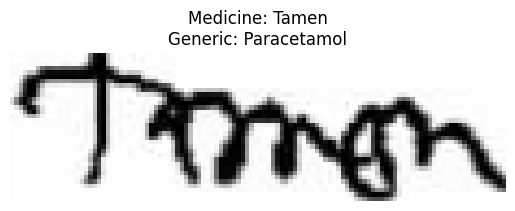

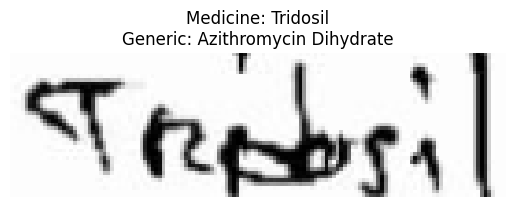

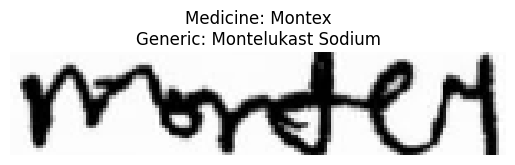

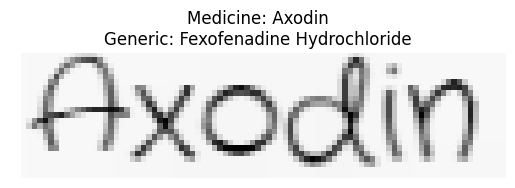

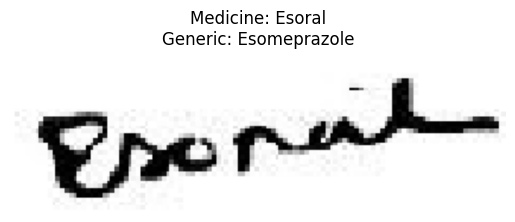

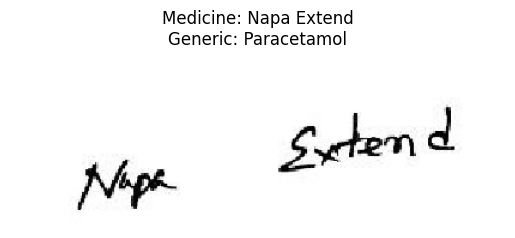

In [9]:
import cv2, matplotlib.pyplot as plt, random, os

for _, row in train_labels.sample(6, random_state=42).iterrows():
    img_path = os.path.join(train_dir, row['IMAGE'])  # use IMAGE column
    img = cv2.imread(img_path)
    if img is None:
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(f"Medicine: {row['MEDICINE_NAME']}\nGeneric: {row['GENERIC_NAME']}")
    plt.axis('off')
    plt.show()
    #Dataset consist of drug names only 1 or 2 words (not sentences)...it is word-level classfication

In [10]:
missing = [f for f in train_labels['IMAGE'] if not os.path.exists(os.path.join(train_dir, f))]
print("Missing images:", len(missing))

Missing images: 0


/tmp/ipython-input-3587693987.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette='viridis')


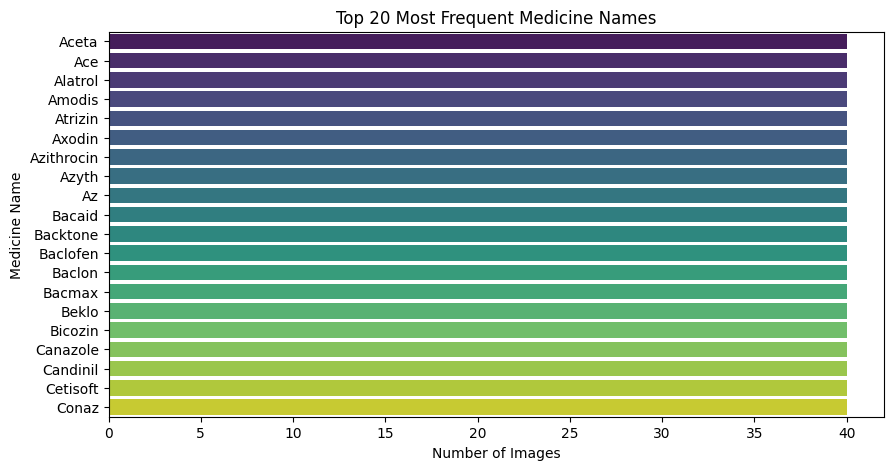

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

top10 = train_labels['MEDICINE_NAME'].value_counts().head(20)
plt.figure(figsize=(10,5))
sns.barplot(x=top10.values, y=top10.index, palette='viridis')
plt.title("Top 20 Most Frequent Medicine Names")
plt.xlabel("Number of Images")
plt.ylabel("Medicine Name")
plt.show()

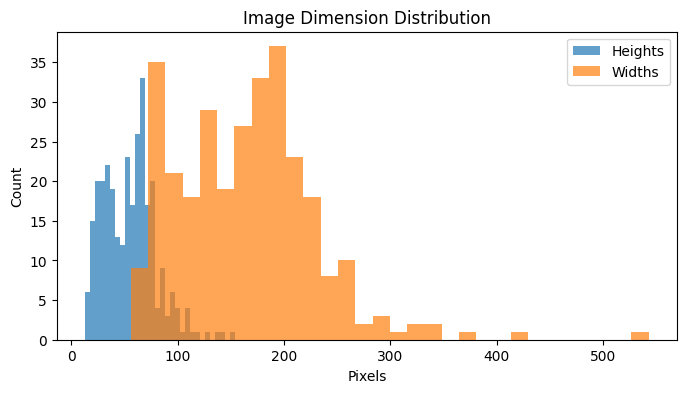

In [12]:
import numpy as np
import cv2, os, random

heights, widths = [], []
for img_name in random.sample(os.listdir(train_dir), min(300, len(os.listdir(train_dir)))):
    img = cv2.imread(os.path.join(train_dir, img_name))
    if img is None: continue
    h, w = img.shape[:2]
    heights.append(h)
    widths.append(w)

plt.figure(figsize=(8,4))
plt.hist(heights, bins=30, alpha=0.7, label='Heights')
plt.hist(widths, bins=30, alpha=0.7, label='Widths')
plt.title("Image Dimension Distribution")
plt.xlabel("Pixels")
plt.ylabel("Count")
plt.legend()
plt.show()

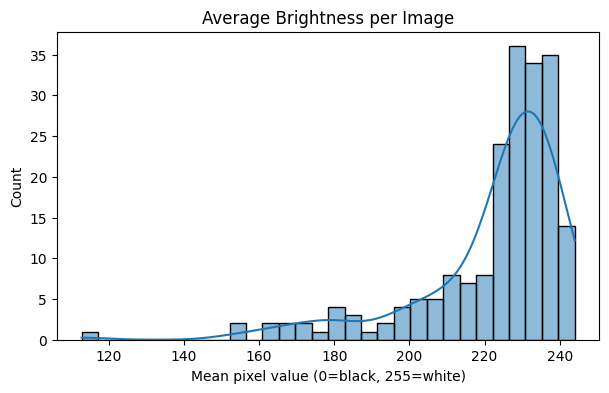

In [13]:
import numpy as np
gray_means = []

for img_name in random.sample(os.listdir(train_dir), min(200, len(os.listdir(train_dir)))):
    img = cv2.imread(os.path.join(train_dir, img_name), cv2.IMREAD_GRAYSCALE)
    gray_means.append(np.mean(img))

plt.figure(figsize=(7,4))
sns.histplot(gray_means, bins=30, kde=True)
plt.title("Average Brightness per Image")
plt.xlabel("Mean pixel value (0=black, 255=white)")
plt.ylabel("Count")
plt.show()
#Tells you if some images are too light/dark → you’ll know whether normalization or thresholding is needed.
#Most images have mean pixel values between 210–240, meaning they are light gray to white backgrounds.
#A small number have mean brightness around 150–180 → darker scans or thicker ink. brightness is uneven across samples

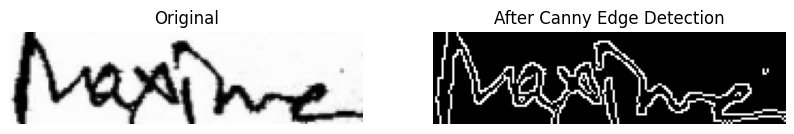

In [14]:
import matplotlib.pyplot as plt
import cv2, random

sample = random.choice(os.listdir(train_dir))
img_path = os.path.join(train_dir, sample)
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(img, 100, 200)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(edges, cmap='gray')
plt.title("After Canny Edge Detection")
plt.axis('off')

plt.show()
#The Canny image clearly emphasizes the medicine’s shape and strokes.

/tmp/ipython-input-1599936156.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='word_length', data=train_labels, palette='cool')


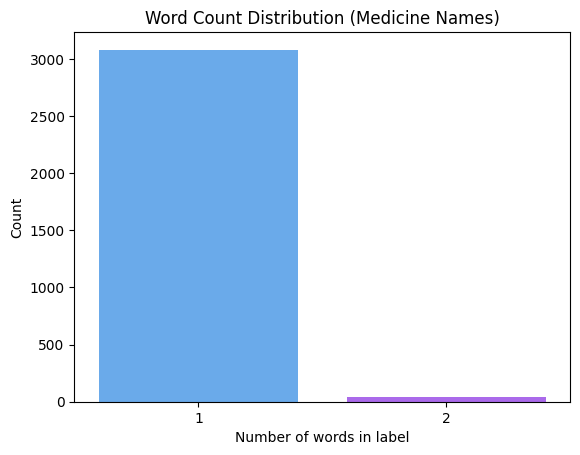

In [15]:
train_labels['word_length'] = train_labels['MEDICINE_NAME'].apply(lambda x: len(x.split()))
import seaborn as sns
sns.countplot(x='word_length', data=train_labels, palette='cool')
plt.title("Word Count Distribution (Medicine Names)")
plt.xlabel("Number of words in label")
plt.ylabel("Count")
plt.show()

In [16]:
sample_map = train_labels.sample(10)[['MEDICINE_NAME', 'GENERIC_NAME']]
print(sample_map)

     MEDICINE_NAME                GENERIC_NAME
3091       Zithrin      Azithromycin Dihydrate
2912         Tamen                 Paracetamol
220         Axodin  Fexofenadine Hydrochloride
1100        Etizin    Cetirizine Hydrochloride
1422      Flexibac                    Baclofen
1526       Ketocon      Ketoconazole (Shampoo)
2952       Telfast  Fexofenadine Hydrochloride
2432         Odmon          Montelukast Sodium
3117       Zithrin      Azithromycin Dihydrate
1567       Ketoral       Ketoconazole (Tablet)


In [17]:
import cv2
import numpy as np
import os
from tqdm import tqdm

# --- KaggleHub dataset base ---
dataset_path = "/root/.cache/kagglehub/datasets/mamun1113/doctors-handwritten-prescription-bd-dataset/versions/1"
train_input_dir = os.path.join(dataset_path, "Doctor’s Handwritten Prescription BD dataset/Training/training_words")
train_output_dir = "/kaggle/working/processed_training"
os.makedirs(train_output_dir, exist_ok=True)

print("Input dir exists:", os.path.exists(train_input_dir))
print("Example files:", os.listdir(train_input_dir)[:5])

def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None

    img = cv2.GaussianBlur(img, (3, 3), 0)
    edges = cv2.Canny(img, 100, 200)
    edges = cv2.resize(edges, (224, 224))
    norm_img = edges / 255.0
    return norm_img

for fname in tqdm(os.listdir(train_input_dir)):
    src_path = os.path.join(train_input_dir, fname)
    dst_path = os.path.join(train_output_dir, fname)
    processed = preprocess_image(src_path)
    if processed is not None:
        cv2.imwrite(dst_path, (processed * 255).astype(np.uint8))

print("Preprocessing complete.")
print("Processed images saved in:", train_output_dir)


Input dir exists: True
Example files: ['1863.png', '127.png', '1952.png', '1678.png', '1303.png']


100%|██████████| 3120/3120 [00:04<00:00, 707.11it/s]

Preprocessing complete.
Processed images saved in: /kaggle/working/processed_training


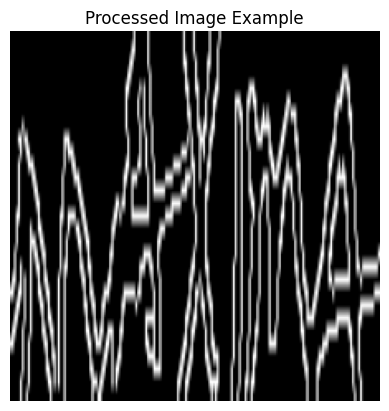

In [18]:
import matplotlib.pyplot as plt
img = cv2.imread(os.path.join(train_output_dir, os.listdir(train_output_dir)[0]), cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title("Processed Image Example")
plt.axis('off')
plt.show()

In [20]:
cross = train_labels.groupby(['GENERIC_NAME'])['MEDICINE_NAME'].nunique().sort_values(ascending=False)
cross.head(15)
#See if multiple brand names map to the same generic.

,MEDICINE_NAME
GENERIC_NAME,
Esomeprazole,10
Fexofenadine Hydrochloride,9
Montelukast Sodium,9
Baclofen,8
Fluconazole,7
Azithromycin Dihydrate,6
Metronidazole,6
Paracetamol,6
Cetirizine Hydrochloride,5


Text(0.5, 1.0, 'Aspect ratio (w/h)')

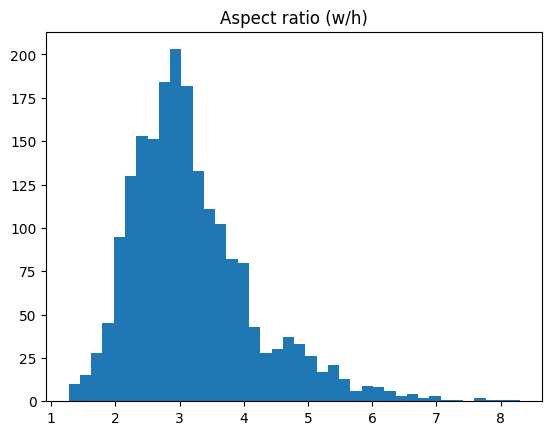

In [21]:
ratios=[]
for f in os.listdir(train_input_dir)[:2000]:
    img=cv2.imread(os.path.join(train_input_dir,f),cv2.IMREAD_GRAYSCALE)
    if img is not None:
        h,w=img.shape
        ratios.append(w/h)
plt.hist(ratios, bins=40); plt.title("Aspect ratio (w/h)")

Text(0.5, 1.0, 'Laplacian variance (blur measure)')

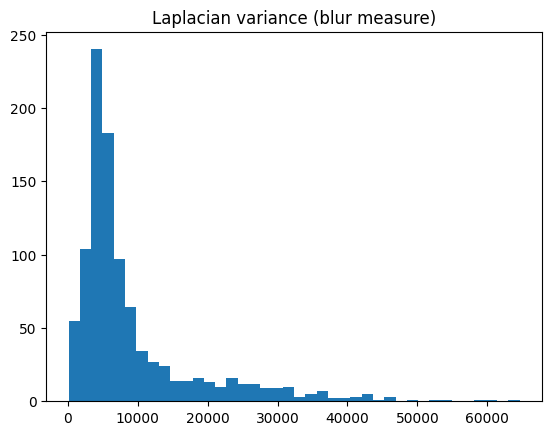

In [22]:
def blur_score(p):
    i=cv2.imread(p,0)
    return cv2.Laplacian(i, cv2.CV_64F).var() if i is not None else np.nan

scores=[blur_score(os.path.join(train_input_dir,f)) for f in os.listdir(train_input_dir)[:1000]]
plt.hist(scores,bins=40); plt.title("Laplacian variance (blur measure)")

Text(0.5, 1.0, 'Brightness vs Contrast')

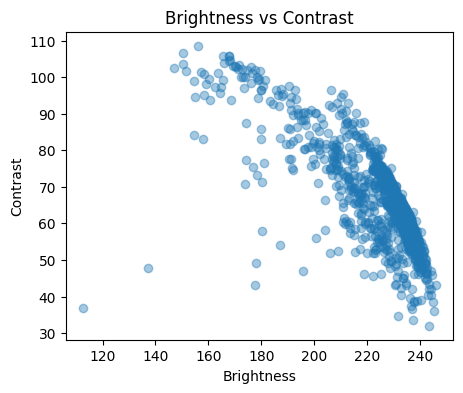

In [23]:
br,ct=[],[]
for f in os.listdir(train_input_dir)[:1000]:
    img=cv2.imread(os.path.join(train_input_dir,f),0)
    if img is not None:
        br.append(np.mean(img)); ct.append(np.std(img))
plt.figure(figsize=(5,4))
plt.scatter(br, ct, alpha=0.4)
plt.xlabel("Brightness"); plt.ylabel("Contrast")
plt.title("Brightness vs Contrast")

Text(0.5, 1.0, 'Ink density distribution')

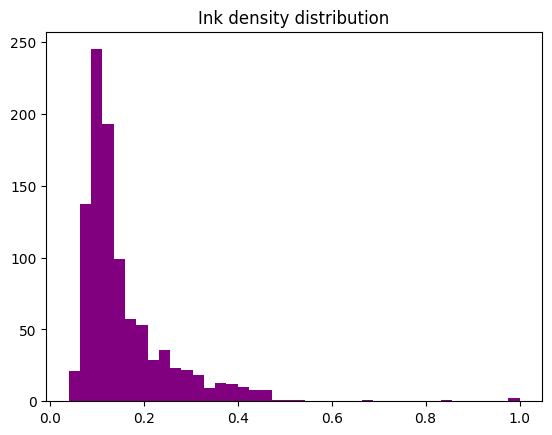

In [24]:
dens=[]
for f in os.listdir(train_input_dir)[:1000]:
    img=cv2.imread(os.path.join(train_input_dir,f),0)
    if img is not None:
        dens.append((img < 200).mean())
plt.hist(dens,bins=40,color='purple'); plt.title("Ink density distribution")

# CRNN based OCR

Imports & Paths

In [25]:
import os, random, time, math
from pathlib import Path
import numpy as np
import pandas as pd
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

DATA_DIR = r"/root/.cache/kagglehub/datasets/mamun1113/doctors-handwritten-prescription-bd-dataset/versions/1/Doctor’s Handwritten Prescription BD dataset"

TRAIN_IMG_DIR = os.path.join(DATA_DIR, "Training", "training_words")
TRAIN_LABEL   = os.path.join(DATA_DIR, "Training", "training_labels.csv")

VAL_IMG_DIR   = os.path.join(DATA_DIR, "Validation", "validation_words")
VAL_LABEL     = os.path.join(DATA_DIR, "Validation", "validation_labels.csv")

TEST_IMG_DIR  = os.path.join(DATA_DIR, "Testing", "testing_words")
TEST_LABEL    = os.path.join(DATA_DIR, "Testing", "testing_labels.csv")


HyperParameters

In [58]:
IMG_H = 64
IMG_W = 256
BATCH_SIZE = 32
NUM_WORKERS = 2
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
LR = 2e-4
EPOCHS = 50
PRINT_EVERY = 1

Transforms

In [59]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((IMG_H, IMG_W)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

Charset Building

In [60]:
train_df = pd.read_csv(TRAIN_LABEL)
train_df = train_df.dropna(subset=["MEDICINE_NAME"])
all_text = " ".join(train_df["MEDICINE_NAME"].astype(str).str.lower().values)

allowed = list("abcdefghijklmnopqrstuvwxyz0123456789-.,/()%+ ")
present = sorted(list(set([c for c in all_text if c in allowed])))

if ' ' not in present:
    present.append(' ')

charset = present
char2idx = {c: i+1 for i, c in enumerate(charset)}
idx2char = {i+1: c for i, c in enumerate(charset)}
CTC_BLANK = 0
VOCAB_SIZE = len(char2idx) + 1

Dataset & Collate Function

In [61]:
class CRNNDataset(Dataset):
    def __init__(self, img_dir, csv_path, transform=None):
        self.img_dir = img_dir
        self.df = pd.read_csv(csv_path)
        self.df = self.df.dropna(subset=["MEDICINE_NAME"])
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_name = row["IMAGE"]
        label_str = str(row["MEDICINE_NAME"]).lower()
        img_path = os.path.join(self.img_dir, str(img_name))

        try:
            img = Image.open(img_path).convert('L')
        except Exception:
            img = Image.new('L', (IMG_W, IMG_H), color=255)

        if self.transform:
            img = self.transform(img)

        label_enc = [char2idx[c] for c in label_str if c in char2idx]
        if len(label_enc) == 0:
            label_enc = [0]

        return img, label_enc, len(label_enc)

def ocr_collate(batch):
    imgs, labels, lengths = zip(*batch)
    imgs = torch.stack(imgs, 0)
    label_lens = torch.tensor(lengths, dtype=torch.long)

    labels_concat = [c for seq in labels for c in seq]
    if len(labels_concat) == 0:
        labels_concat = torch.tensor([], dtype=torch.long)
    else:
        labels_concat = torch.tensor(labels_concat, dtype=torch.long)

    return imgs, labels_concat, label_lens

Dataloaders

In [62]:
train_dataset = CRNNDataset(TRAIN_IMG_DIR, TRAIN_LABEL, transform=transform)
val_dataset = CRNNDataset(VAL_IMG_DIR, VAL_LABEL, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True,
                          num_workers=NUM_WORKERS, collate_fn=ocr_collate)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False,
                        num_workers=NUM_WORKERS, collate_fn=ocr_collate)

print('Train size:', len(train_dataset), 'Val size:', len(val_dataset))

batch = next(iter(train_loader))
print('Batch items:', len(batch))
print('Images shape:', batch[0].shape)
print('Labels len:', batch[1].shape if isinstance(batch[1], torch.Tensor) else len(batch[1]))
print('Label lengths:', batch[2].shape)

Train size: 3120 Val size: 780
Batch items: 3
Images shape: torch.Size([32, 1, 64, 256])
Labels len: torch.Size([206])
Label lengths: torch.Size([32])


CRNN Architecture

In [63]:
class CRNN(nn.Module):
    def __init__(self, img_h=IMG_H, nc=1, nclass=VOCAB_SIZE, nh=256):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(nc,64,3,1,1), nn.BatchNorm2d(64), nn.ReLU(True),
            nn.MaxPool2d(2,2),
            nn.Conv2d(64,128,3,1,1), nn.BatchNorm2d(128), nn.ReLU(True),
            nn.MaxPool2d((2,1),(2,1)),
            nn.Conv2d(128,256,3,1,1), nn.BatchNorm2d(256), nn.ReLU(True),
            nn.Conv2d(256,256,3,1,1), nn.ReLU(True),
            nn.MaxPool2d((2,1),(2,1)),
            nn.Conv2d(256,512,3,1,1), nn.BatchNorm2d(512), nn.ReLU(True),
            nn.Conv2d(512,512,3,1,1), nn.ReLU(True),
            nn.MaxPool2d((2,1),(2,1)),
            nn.Conv2d(512,512,2,1,0), nn.BatchNorm2d(512), nn.ReLU(True)
        )
        self.rnn = nn.LSTM(512, nh, num_layers=2, bidirectional=True, batch_first=True)
        self.embedding = nn.Linear(nh*2, nclass)

    def forward(self, x):
        conv = self.cnn(x)
        b,c,h,w = conv.size()
        if h != 1:
            conv = F.adaptive_avg_pool2d(conv, (1, w))
            b,c,h,w = conv.size()
        conv = conv.squeeze(2)
        conv = conv.permute(0,2,1)
        out, _ = self.rnn(conv)
        out = self.embedding(out)
        out = out.log_softmax(2)
        return out.permute(1,0,2)

model = CRNN().to(DEVICE)
ctc_loss = nn.CTCLoss(blank=CTC_BLANK, zero_infinity=True)
optimizer = optim.Adam(model.parameters(), lr=LR)

Decoding Utility: CRNN+ CTC gives frame wise predictions

In [64]:
def decode_ctc(out_logits):
    probs = out_logits.permute(1,0,2).argmax(2).cpu().numpy()
    results = []
    for seq in probs:
        prev = 0
        s = []
        for ch in seq:
            if ch != prev and ch != CTC_BLANK:
                s.append(idx2char.get(int(ch), ''))
            prev = ch
        results.append(''.join(s))
    return results

Training + Validation

Epoch 1/50  train_loss 3.2337  val_loss 3.2159  time 20.8s
PRED:  | GT: aceta
PRED:  | GT: aceta
PRED:  | GT: aceta
PRED:  | GT: aceta
PRED:  | GT: aceta
Validation Accuracy: 0.00%
Epoch 2/50  train_loss 3.1992  val_loss 3.1803  time 21.6s
PRED:  | GT: aceta
PRED:  | GT: aceta
PRED:  | GT: aceta
PRED:  | GT: aceta
PRED:  | GT: aceta
Validation Accuracy: 0.00%
Epoch 3/50  train_loss 3.1562  val_loss 3.1423  time 22.0s
PRED:  | GT: aceta
PRED:  | GT: aceta
PRED:  | GT: aceta
PRED:  | GT: aceta
PRED:  | GT: aceta
Validation Accuracy: 0.00%
Epoch 4/50  train_loss 3.1114  val_loss 3.0858  time 21.6s
PRED:  | GT: aceta
PRED:  | GT: aceta
PRED:  | GT: aceta
PRED:  | GT: aceta
PRED:  | GT: aceta
Validation Accuracy: 0.00%
Epoch 5/50  train_loss 3.0512  val_loss 3.0584  time 21.3s
PRED:  | GT: aceta
PRED:  | GT: aceta
PRED:  | GT: aceta
PRED:  | GT: aceta
PRED:  | GT: aceta
Validation Accuracy: 0.00%
Epoch 6/50  train_loss 2.9507  val_loss 3.0386  time 21.8s
PRED: a | GT: aceta
PRED: a | GT: ac

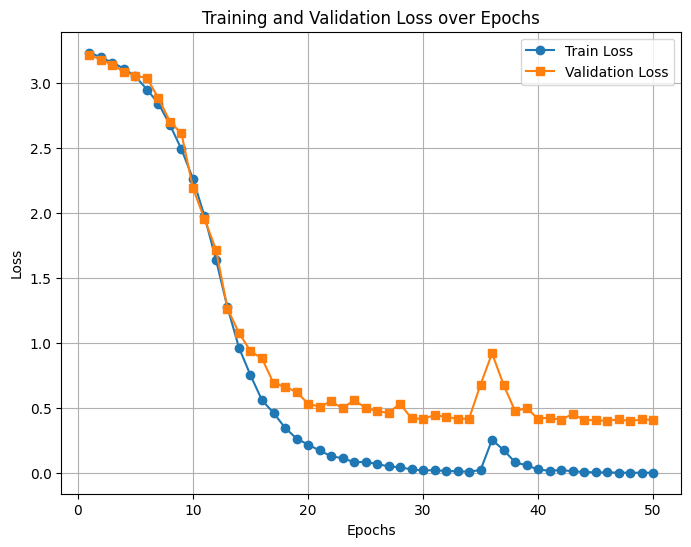

In [67]:
from math import inf
import matplotlib.pyplot as plt
import time

best_val = inf
train_losses = []
val_losses = []

for epoch in range(1, EPOCHS+1):
    model.train()
    total_loss = 0.0
    n_batches = 0
    t0 = time.time()

    for imgs, labels_concat, label_lens in train_loader:
        imgs = imgs.to(DEVICE)
        labels_concat = labels_concat.to(DEVICE)
        label_lens = label_lens.to(DEVICE)

        preds = model(imgs)
        input_lens = torch.full((imgs.size(0),), preds.size(0), dtype=torch.long).to(DEVICE)

        loss = ctc_loss(preds, labels_concat, input_lens, label_lens)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        n_batches += 1

    avg_train = total_loss / max(1, n_batches)
    train_losses.append(avg_train)

    model.eval()
    val_loss = 0.0
    examples = []

    with torch.no_grad():
        for imgs, labels_concat, label_lens in val_loader:
            imgs = imgs.to(DEVICE)
            labels_concat = labels_concat.to(DEVICE)
            label_lens = label_lens.to(DEVICE)

            preds = model(imgs)
            input_lens = torch.full((imgs.size(0),), preds.size(0), dtype=torch.long).to(DEVICE)
            loss = ctc_loss(preds, labels_concat, input_lens, label_lens)
            val_loss += loss.item()

            outs = decode_ctc(preds)
            gt_list = []
            idx = 0
            for L in label_lens.cpu().numpy():
                seq = labels_concat[idx: idx+L].cpu().numpy()
                gt = ''.join([idx2char.get(int(c),'') for c in seq if int(c) in idx2char])
                gt_list.append(gt)
                idx += L
            examples.extend(list(zip(outs, gt_list)))

    avg_val = val_loss / max(1, len(val_loader))
    val_losses.append(avg_val)
    t1 = time.time()

    print(f"Epoch {epoch}/{EPOCHS}  train_loss {avg_train:.4f}  val_loss {avg_val:.4f}  time {t1-t0:.1f}s")

    for p,g in examples[:5]:
        print("PRED:", p, "| GT:", g)

    correct = sum([1 for p,g in examples if p == g])
    acc = correct / len(examples) if examples else 0
    print(f"Validation Accuracy: {acc*100:.2f}%")

    if avg_val < best_val:
        best_val = avg_val
        torch.save(model.state_dict(), "crnn_best.pth")


# Plot loss graph
plt.figure(figsize=(8,6))
plt.plot(range(1, EPOCHS+1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, EPOCHS+1), val_losses, label='Validation Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()


## Fuzzy Matching Correction

In [68]:
train_df = pd.read_csv(TRAIN_LABEL)
train_df = train_df.dropna(subset=["MEDICINE_NAME"])
medicines = sorted(list(train_df["MEDICINE_NAME"].astype(str).str.strip().unique()))
medicines_lower = [m.lower() for m in medicines]
print("Unique medicine names:", len(medicines), "examples:", medicines[:10])

# Try to use rapidfuzz (fast & robust); fallback to difflib if not present
use_rapidfuzz = False
try:
    from rapidfuzz import process, fuzz
    use_rapidfuzz = True
    print("Using rapidfuzz for fuzzy matching.")
except Exception:
    from difflib import get_close_matches, SequenceMatcher
    print("rapidfuzz not available — using difflib fallback (slower, OK).")

# fuzzy correction function
def fuzzy_correct(pred, candidates=medicines_lower):
    """
    pred: raw OCR string (already lowercased)
    returns: best_match (original-cased from medicines list), score (0-100)
    """
    if len(pred.strip()) == 0:
        return "", 0.0
    target = pred.lower()
    if use_rapidfuzz:
        best = process.extractOne(target, candidates, scorer=fuzz.ratio)
        if best is None:
            return "", 0.0
        match_str, score, _ = best
        # return the original-cased medicine name for neatness
        idx = candidates.index(match_str)
        return medicines[idx], float(score)
    else:
        # difflib fallback
        matches = get_close_matches(target, candidates, n=1, cutoff=0.0)
        if len(matches) == 0:
            # fallback: return candidate with highest sequence ratio
            best_score = -1.0
            best_match = ""
            for cand in candidates:
                r = SequenceMatcher(None, target, cand).ratio()
                if r > best_score:
                    best_score = r
                    best_match = cand
            if best_match == "":
                return "", 0.0
            idx = candidates.index(best_match)
            return medicines[idx], float(best_score * 100.0)
        else:
            best_match = matches[0]
            idx = candidates.index(best_match)
            return medicines[idx], float(SequenceMatcher(None, target, best_match).ratio() * 100.0)

Unique medicine names: 78 examples: ['Ace', 'Aceta', 'Alatrol', 'Amodis', 'Atrizin', 'Axodin', 'Az', 'Azithrocin', 'Azyth', 'Bacaid']
Using rapidfuzz for fuzzy matching.


## Test on a random image from test sample

In [ ]:
try:
    import Levenshtein as lev
    def cer(a,b):
        if len(b)==0: return 1.0
        return lev.distance(a,b)/len(b)
except Exception:
    def cer(a,b):
        def ed(s,t):
            m=len(s); n=len(t)
            dp=[[0]*(n+1) for _ in range(m+1)]
            for i in range(m+1): dp[i][0]=i
            for j in range(n+1): dp[0][j]=j
            for i in range(1,m+1):
                for j in range(1,n+1):
                    dp[i][j] = min(
                        dp[i-1][j]+1,
                        dp[i][j-1]+1,
                        dp[i-1][j-1] + (0 if s[i-1]==t[j-1] else 1)
                    )
            return dp[m][n]
        if len(b)==0: return 1.0
        return ed(a,b)/len(b)


# Word Error Rate (single word comparison)
def wer(pred, gt):
    return 0.0 if pred == gt else 1.0

# Character Accuracy
def char_accuracy(pred, gt):
    return 1.0 - cer(pred, gt)



model.eval()

val_cers_raw = []
val_cers_corr = []

val_wers_raw = []
val_wers_corr = []

val_char_acc_raw = []
val_char_acc_corr = []

examples = []  # store (raw, corrected, gt, fuzzy_score)

with torch.no_grad():
    for imgs, labels_concat, label_lens in val_loader:

        imgs = imgs.to(DEVICE)
        preds = model(imgs)
        outs = decode_ctc(preds)

        # rebuild ground truth strings
        idx = 0
        gt_list = []
        for L in label_lens.cpu().numpy():
            seq = labels_concat[idx: idx+L].cpu().numpy()
            gt = ''.join([idx2char.get(int(c),'') for c in seq if int(c) in idx2char])
            gt_list.append(gt)
            idx += L

        for o, g in zip(outs, gt_list):

            g = g.lower()


            raw_cer = cer(o, g)
            raw_wer = wer(o, g)
            raw_acc = char_accuracy(o, g)

            # fuzzy correction
            best_match, score = fuzzy_correct(o, medicines_lower)
            corr_name = best_match.lower() if best_match else ""

            corr_cer = cer(corr_name, g)
            corr_wer = wer(corr_name, g)
            corr_acc = char_accuracy(corr_name, g)

            # store
            val_cers_raw.append(raw_cer)
            val_cers_corr.append(corr_cer)

            val_wers_raw.append(raw_wer)
            val_wers_corr.append(corr_wer)

            val_char_acc_raw.append(raw_acc)
            val_char_acc_corr.append(corr_acc)

            # store examples
            if len(examples) < 200:
                examples.append((o, corr_name, g, score))


# SUMMARY METRICS

raw_mean_cer = float(np.mean(val_cers_raw))
corr_mean_cer = float(np.mean(val_cers_corr))

mean_raw_wer = float(np.mean(val_wers_raw))
mean_corr_wer = float(np.mean(val_wers_corr))

mean_raw_acc = float(np.mean(val_char_acc_raw))
mean_corr_acc = float(np.mean(val_char_acc_corr))

print("\n========= VALIDATION RESULTS =========")
print("Raw CER:", raw_mean_cer)
print("Corrected CER:", corr_mean_cer)
print(f"Relative CER Improvement: {((raw_mean_cer - corr_mean_cer)/raw_mean_cer*100):.2f}%")

print("\nRaw WER:", mean_raw_wer)
print("Corrected WER:", mean_corr_wer)

print("\nRaw Character Accuracy:", mean_raw_acc)
print("Corrected Character Accuracy:", mean_corr_acc)


print("\nExamples (raw -> corrected -> gt) [score%]:")
for i, (raw, corr, gt, score) in enumerate(examples[:30]):
    print(f"{i+1:02d}. '{raw}' -> '{corr}'  | GT: '{gt}'  [score={score:.1f}]")


# SAVE MODEL + MEDICINES LIST

torch.save(model.state_dict(), 'crnn_final.pth')

import json
with open('medicines_list.json','w',encoding='utf-8') as f:
    json.dump(medicines, f, ensure_ascii=False, indent=2)

print("\nSaved CRNN model to 'crnn_final.pth' and medicines list to 'medicines_list.json'")


========= VALIDATION RESULTS =========
Raw CER: 0.08910325785325784
Corrected CER: 0.043832417582417585
Relative CER Improvement: 50.81%

Raw WER: 0.2987179487179487
Corrected WER: 0.05641025641025641

Raw Character Accuracy: 0.9108967421467422
Corrected Character Accuracy: 0.9561675824175825

Examples (raw -> corrected -> gt) [score%]:
01. 'aceta' -> 'aceta'  | GT: 'aceta'  [score=100.0]
02. 'accf' -> 'ace'  | GT: 'aceta'  [score=57.1]
03. 'aceta' -> 'aceta'  | GT: 'aceta'  [score=100.0]
04. 'aceta' -> 'aceta'  | GT: 'aceta'  [score=100.0]
05. 'aceta' -> 'aceta'  | GT: 'aceta'  [score=100.0]
06. 'aceta' -> 'aceta'  | GT: 'aceta'  [score=100.0]
07. 'aceta' -> 'aceta'  | GT: 'aceta'  [score=100.0]
08. 'aceta' -> 'aceta'  | GT: 'aceta'  [score=100.0]
09. 'aceta' -> 'aceta'  | GT: 'aceta'  [score=100.0]
10. 'aceta' -> 'aceta'  | GT: 'aceta'  [score=100.0]
11. 'ace' -> 'ace'  | GT: 'ace'  [score=100.0]
12. 'acl' -> 'ace'  | GT: 'ace'  [score=66.7]
13. 'ace' -> 'ace'  | GT: 'ace'  [score=1

In [71]:
import matplotlib.pyplot as plt
import numpy as np

def plot_model_performance(raw_cers, corr_cers, raw_wers, corr_wers):
    """
    Plot bar graphs showing raw vs corrected CER and WER.

    Args:
        raw_cers  : list of raw CERs for validation samples
        corr_cers : list of corrected CERs (after fuzzy correction)
        raw_wers  : list of raw WERs for validation samples
        corr_wers : list of corrected WERs
    """
    # Compute mean values
    mean_raw_cer = np.mean(raw_cers) * 100
    mean_corr_cer = np.mean(corr_cers) * 100
    mean_raw_wer = np.mean(raw_wers) * 100
    mean_corr_wer = np.mean(corr_wers) * 100

    metrics = ['CER (%)', 'WER (%)']
    raw_vals = [mean_raw_cer, mean_raw_wer]
    corr_vals = [mean_corr_cer, mean_corr_wer]

    x = np.arange(len(metrics))
    width = 0.35

    plt.figure(figsize=(8,6))
    plt.bar(x - width/2, raw_vals, width, label='Raw Predictions', color='skyblue')
    plt.bar(x + width/2, corr_vals, width, label='Corrected Predictions', color='lightgreen')

    for i, (r, c) in enumerate(zip(raw_vals, corr_vals)):
        plt.text(i - width/2, r + 1, f"{r:.2f}%", ha='center', va='bottom')
        plt.text(i + width/2, c + 1, f"{c:.2f}%", ha='center', va='bottom')

    plt.xticks(x, metrics)
    plt.ylabel('Error Rate (%)')
    plt.title('OCR Model Performance: Raw vs Corrected')
    plt.ylim(0, max(max(raw_vals), max(corr_vals)) + 10)
    plt.legend()
    plt.show()


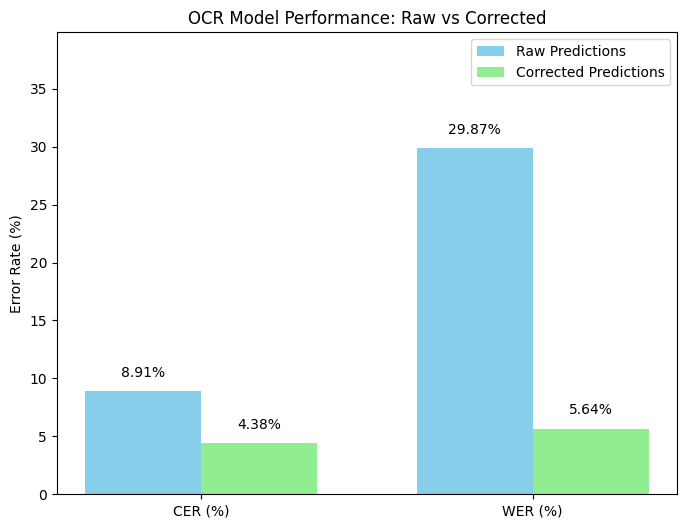

In [72]:
plot_model_performance(
    val_cers_raw,
    val_cers_corr,
    val_wers_raw,
    val_wers_corr
)


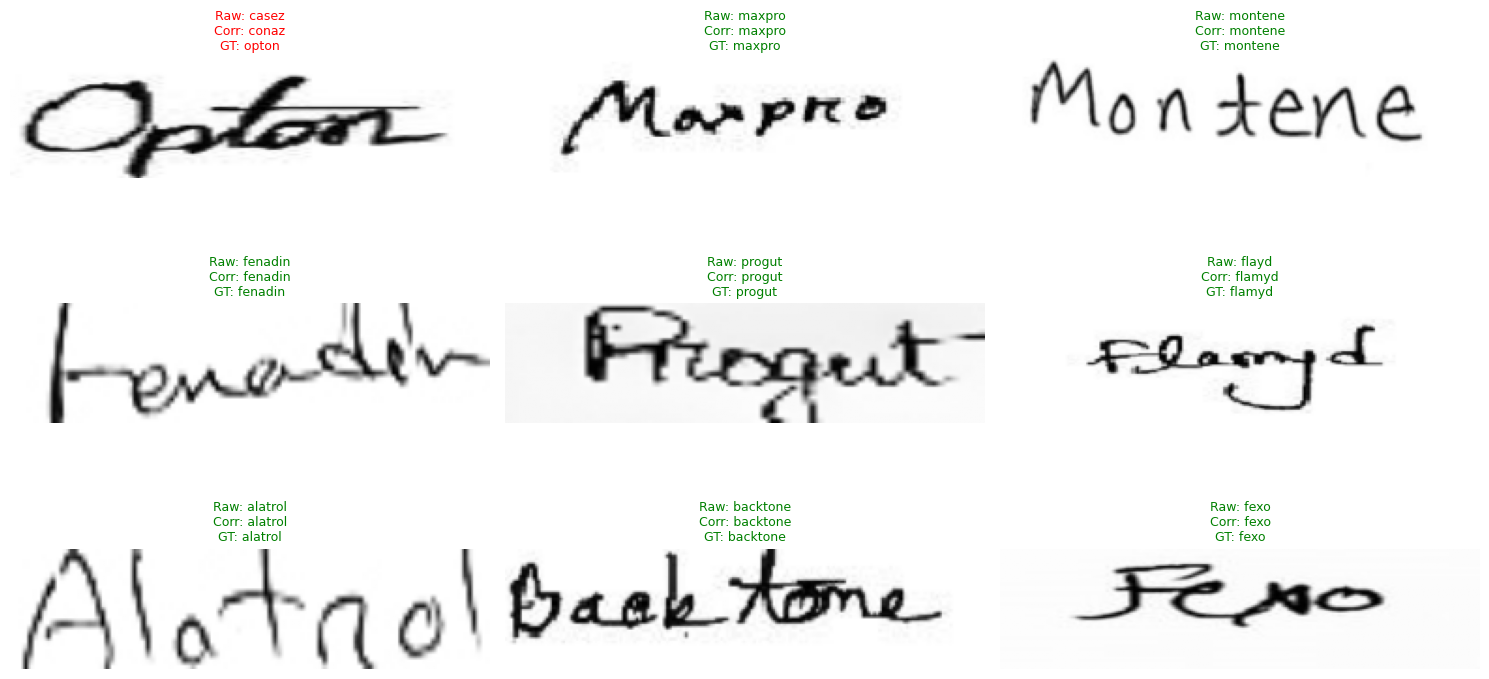

In [ ]:
import matplotlib.pyplot as plt
import torch
import numpy as np

num_samples = 9
all_imgs = []
all_gts = []

for imgs, labels_concat, label_lens in val_loader:
    for i in range(imgs.size(0)):
        all_imgs.append(imgs[i].cpu())
        seq_len = label_lens[i].item()
        seq = labels_concat[:seq_len].cpu().numpy()
        gt = ''.join([idx2char.get(int(c), '') for c in seq])
        all_gts.append(gt)
        labels_concat = labels_concat[seq_len:]  # move to next label

indices = np.random.choice(len(all_imgs), num_samples, replace=False)

plt.figure(figsize=(15, 8))
for i, idx in enumerate(indices):
    img = all_imgs[idx]
    gt = all_gts[idx]

    # Predict
    model.eval()
    with torch.no_grad():
        pred = model(img.unsqueeze(0).to(DEVICE))
    pred_seq = decode_ctc(pred)
    raw_text = pred_seq[0]

    # Fuzzy correction
    best_match, score = fuzzy_correct(raw_text, medicines_lower)
    corrected_text = best_match.lower() if best_match else raw_text

    color_raw = "green" if raw_text == gt else "red"
    color_corr = "green" if corrected_text == gt else "red"

    ax = plt.subplot(3, 3, i+1)
    plt.imshow(img.squeeze().cpu(), cmap='gray')
    plt.title(f"Raw: {raw_text}\nCorr: {corrected_text}\nGT: {gt}", color=color_corr, fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()
